In [2]:
from scipy import stats

In [3]:
from gradients import *

In [ ]:
surf_labels, mask_removed = load_atlas()

from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# pairwise

In [4]:
d1 = pd.read_csv('rois_pairwise_stats.csv')

In [25]:
d1

,indic,roi,pair,tstat,pvalue,signif
0,ecc,0,baseline__early,-0.444305,0.658053,0
1,ecc,0,baseline__late,-0.947098,0.346514,0
2,ecc,0,early__late,-0.440811,0.660569,0
3,ecc,1,baseline__early,-1.124894,0.264084,0
4,ecc,1,baseline__late,-0.886355,0.378151,0
...,...,...,...,...,...,...
14965,grad4,996,baseline__late,-2.472372,0.015599,1
14966,grad4,996,early__late,-0.467313,0.641579,0
14967,grad4,997,baseline__early,-0.038605,0.969304,0
14968,grad4,997,baseline__late,-0.546235,0.586463,0


In [47]:
statistics = ['tstat']
indicators = ['ecc',
#  'grad1'
 ]
data_range = {
    'fstat': (0, 10),
    'tstat': (-3, 3)
}
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'tstat': 'bwr',
    'pvalue': 'gist_gray',
}

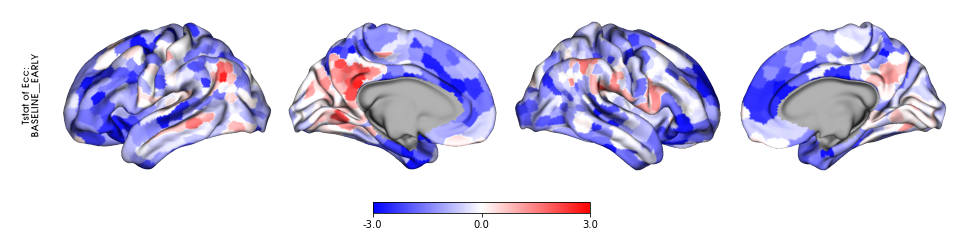

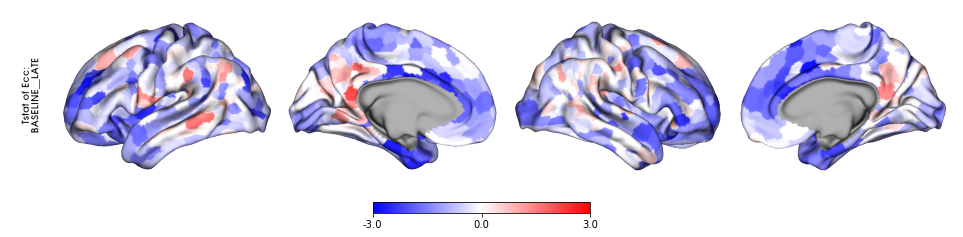

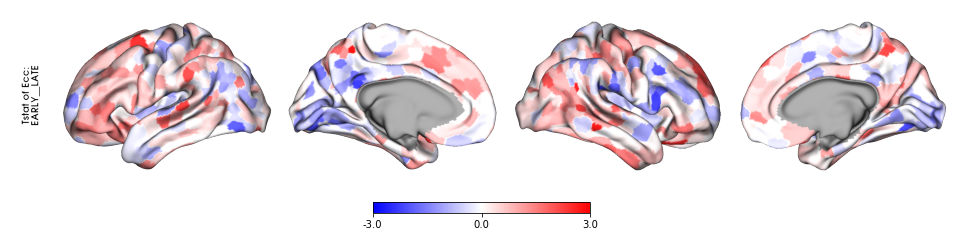

In [48]:
for c in indicators:
    for pair in d1['pair'].unique():
        d = d1[(d1['indic'] == c)&(d1['pair'] == pair)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, s.capitalize() + ' of ' + c.capitalize() + ':\n' + pair.upper(),
            cmap[s], data_range[s])

# anova

In [6]:
d2 = pd.read_csv('rois_anova_stats.csv')

In [7]:
d2

,indic,roi,fstat,pvalue,signif
0,ecc,0,0.408893,0.665331,0
1,ecc,1,0.747181,0.475947,0
2,ecc,2,0.519728,0.596048,0
3,ecc,3,0.059077,0.942663,0
4,ecc,4,0.173517,0.840919,0
...,...,...,...,...,...
4985,grad4,993,2.180296,0.117579,0
4986,grad4,994,0.119942,0.887081,0
4987,grad4,995,2.071467,0.130597,0
4988,grad4,996,3.372169,0.037683,1


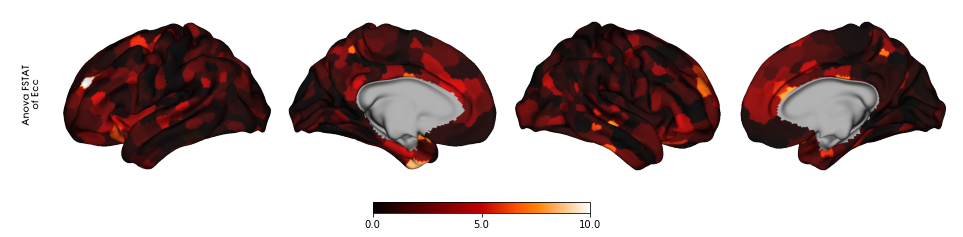

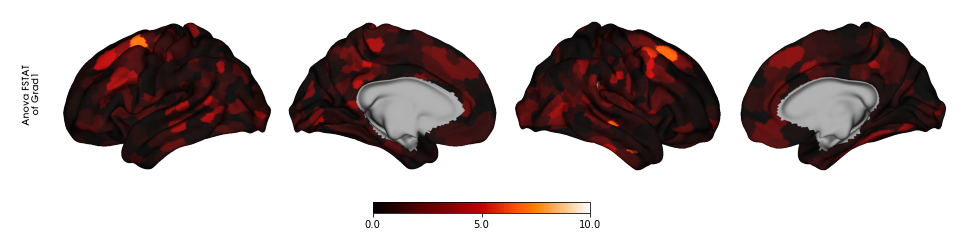

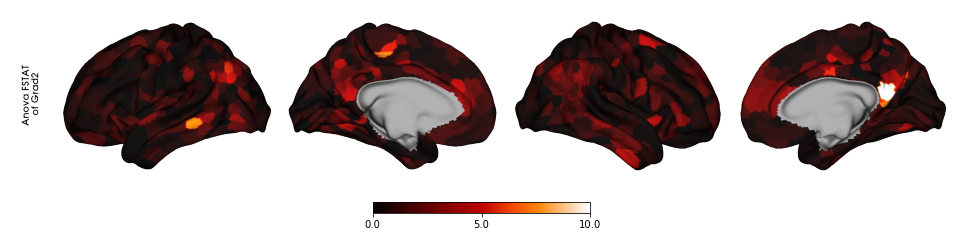

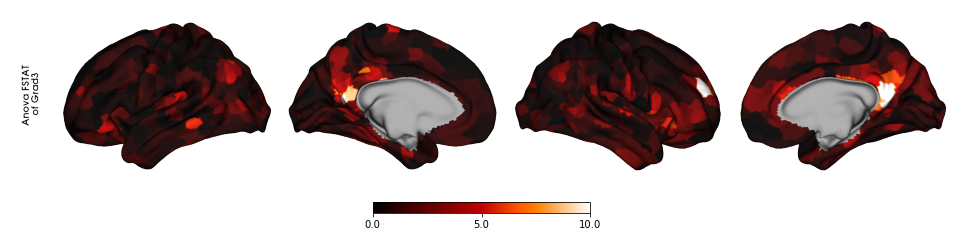

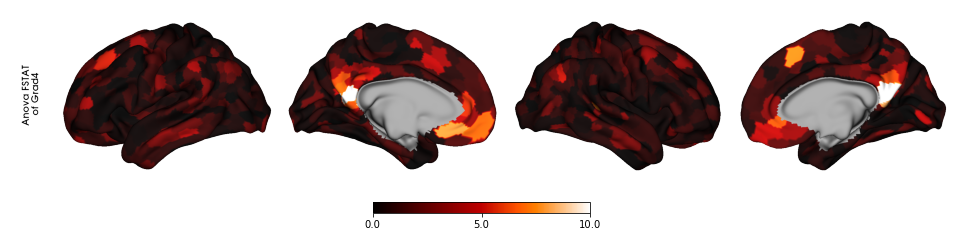

In [ ]:
statistics = ['fstat']
indicators = d2.indic.unique()
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'pvalue': 'gist_gray'
}
data_range = {
    'fstat': (0, 10)
}

for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], data_range[s])

# pingouin

In [8]:
import pingouin as pg

In [9]:
df = pd.read_csv('subjects_gradients_ecc.csv')

In [ ]:
d3 = df.groupby('roi').apply(pg.rm_anova, dv='value', within='epic', subject='subj')
d3

In [14]:
df1 = df[df.indic == 'ecc']

In [15]:
d4 = df1.groupby('roi').apply(pg.rm_anova, dv='value', within='epic', subject='subj')
d4

,,Source,ddof1,ddof2,F,p-unc,np2,eps,p-GG-corr,sphericity,W-spher,p-spher
roi,,,,,,,,,,,,
0,0,epic,2,78,0.412618,0.663351,0.010469,0.977595,NaN,NaN,NaN,NaN
1,0,epic,2,78,0.877221,0.420000,0.021998,0.897917,NaN,NaN,NaN,NaN
2,0,epic,2,78,0.666878,0.516210,0.016812,0.992531,NaN,NaN,NaN,NaN
3,0,epic,2,78,0.076593,0.926336,0.001960,0.963704,NaN,NaN,NaN,NaN
4,0,epic,2,78,0.170718,0.843373,0.004358,0.956310,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,epic,2,78,1.047317,0.355759,0.026152,0.937423,NaN,NaN,NaN,NaN
994,0,epic,2,78,1.984302,0.144356,0.048416,0.942446,NaN,NaN,NaN,NaN
995,0,epic,2,78,0.022711,0.977552,0.000582,0.971218,NaN,NaN,NaN,NaN


In [17]:
ALPHA = 0.05

In [18]:
d3[d3['p-unc'] < ALPHA]

,,Source,ddof1,ddof2,F,p-unc,np2,eps,p-GG-corr,sphericity,W-spher,p-spher
roi,,,,,,,,,,,,
4,0,epic,2,78,3.482735,0.035582,0.081980,0.969571,NaN,NaN,NaN,NaN
24,0,epic,2,78,4.649412,0.012370,0.106517,0.987458,NaN,NaN,NaN,NaN
40,0,epic,2,78,3.896889,0.024373,0.090843,0.926335,NaN,NaN,NaN,NaN
41,0,epic,2,78,4.084984,0.020550,0.094812,0.963592,NaN,NaN,NaN,NaN
47,0,epic,2,78,5.446506,0.006107,0.122541,0.898733,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,epic,2,78,4.430629,0.015048,0.102016,0.741283,0.025553,False,0.650987,0.000287
994,0,epic,2,78,6.268619,0.002988,0.138476,0.957092,NaN,NaN,NaN,NaN
995,0,epic,2,78,11.074215,0.000058,0.221156,0.944920,NaN,NaN,NaN,NaN


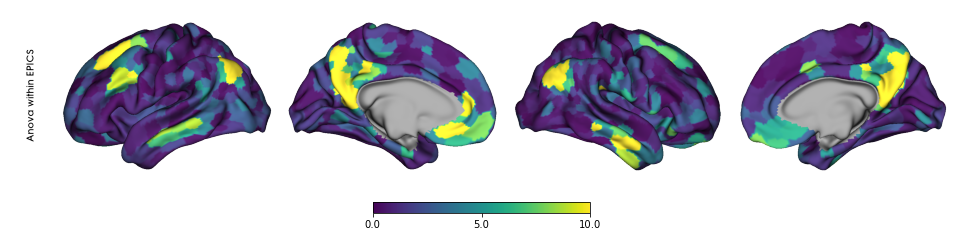

In [ ]:
# for anova's F value
data_range = (0, 10)

data = np.array(d3['F'])
data = map_to_labels(data, surf_labels, mask=mask_removed)
stack_surfplot(data, 'Anova within EPICS', 'viridis', data_range)

In [19]:
d4[d4['p-unc'] < ALPHA]

,,Source,ddof1,ddof2,F,p-unc,np2,eps,p-GG-corr,sphericity,W-spher,p-spher
roi,,,,,,,,,,,,
16,0,epic,2,78,4.967457,0.009320,0.112980,0.980527,NaN,NaN,NaN,NaN
17,0,epic,2,78,5.354618,0.006621,0.120723,0.901599,NaN,NaN,NaN,NaN
24,0,epic,2,78,4.600114,0.012927,0.105507,0.899664,NaN,NaN,NaN,NaN
33,0,epic,2,78,3.740563,0.028103,0.087518,0.825640,0.036770,False,0.788818,0.011030
73,0,epic,2,78,3.365061,0.039647,0.079430,0.859452,0.047413,False,0.836467,0.033615
...,...,...,...,...,...,...,...,...,...,...,...,...
970,0,epic,2,78,4.279754,0.017235,0.098886,0.999140,NaN,NaN,NaN,NaN
971,0,epic,2,78,4.603262,0.012891,0.105572,0.937423,NaN,NaN,NaN,NaN
976,0,epic,2,78,7.786823,0.000825,0.166432,0.989403,NaN,NaN,NaN,NaN


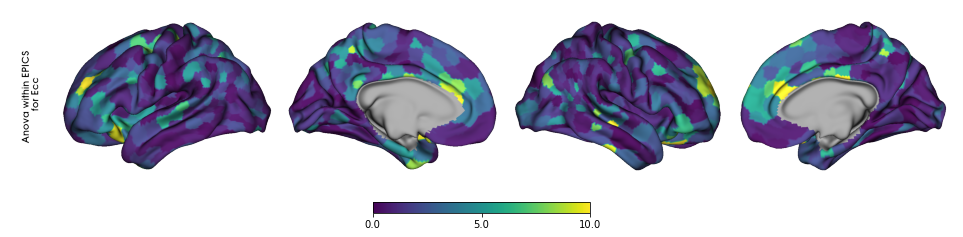

In [24]:
# ECC anova's F value
data_range = (0, 10)

data = np.array(d4['F'])
data = map_to_labels(data, surf_labels, mask=mask_removed)
stack_surfplot(data, 'Anova within EPICS \n for Ecc', 'viridis', data_range)